# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [1]:
!pip install astroML numpy pandas scipy matplotlib seaborn

# 1. In class, we showed histograms of standard deviation and σG of bootstrap samples drawn from a Gaussian distribution with mean equal to 0 and standard deviation equal to 1. Draw a similar histogram of median of 10,000 bootstrap samples drawn from the same Gaussian distribution. According to http://tinyurl.com/h6p43o8, the standard deviation of the sample median of a Gaussian distribution is equal to p π 2n. Overlay a Gaussian distribution on top of the histogram with mean equal to the mean of the generated data sample and standard deviation equal to the standard deviation of the median (Hint: Look up astroML.stats.median sigmaG. Also note that you don’t have to draw 10,000 histograms, but only onehistogram consisting of 10,000 bootstrap resamples.)



In [2]:
# Importing the Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

def first_plot()->None:

    # No. of Total Samples and Sample Size in each Bootstrap
    num_samples = 10000
    sample_size = 100

    # Generating the Random Samples
    gaussian = np.random.normal(0,1,10000)
    medians = np.zeros(num_samples)

    for i in range(num_samples):
        bootstrap_sample = np.random.choice(gaussian, size=sample_size,replace=True)
        medians[i] = np.median(bootstrap_sample)

    plt.hist(medians, bins=50,density=True, alpha=0.7, label='Sample Medians', color='C3')
    mean_of_medians = np.mean(medians)

    std_of_medians = np.sqrt(np.pi/(2*sample_size))

    x = np.linspace(-0.4,0.4,100)

    normal = (1 / (np.sqrt(2 * np.pi) * std_of_medians)) * np.exp(-0.5 * ((x -mean_of_medians) / std_of_medians)**2)

    plt.plot(x, normal, 'C6', label='Gaussian Distribution with √(π/2N)')
    plt.title('Distribution of Median with Bootstrapped Samples')
    plt.xlabel('Median Values for each Bootstrapped Data')
    plt.ylabel('Probability Mass Function')
    plt.legend()
    plt.grid(True)
    plt.show()

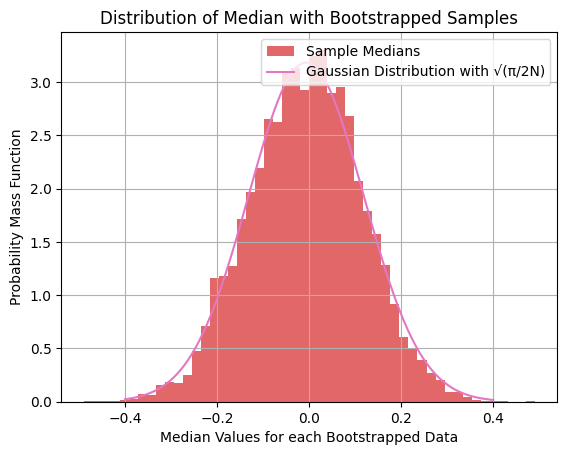

In [3]:
# Calling the Plot Function
first_plot()

# 2. arXiv:1008.4686, Exercise 1 on Page 5, except the last sentence of the question related to σ 2 m. (Hint : Use χ 2 minimization to obtain best-fit values of b and m, instead of linear algebra. You can look up curve fit function in scipy.)

Question : Using the standard linear algebra method of this Section, fit the straight line y = m x + b to the x, y, and σy values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for σx and ρxy. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance σ2 m on the slope of the line?


In [4]:
# Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the linear model function
def linear_model(x, m, b):
    return m * x + b

def second_plot(x: np.array([]), y : np.array([]), sigma_y : np.array([]))->None:

    # Extract data points from 5th to 20th as we have to skip the
    # first 4 data points and Create a new Dataframe to work
    df = pd.DataFrame({'x':x[4:], 'y':y[4:], 'sigma_y':sigma_y[4:]})

    # Perform curve fitting
    popt, pcov = curve_fit(linear_model, df['x'], df['y'], sigma=df['sigma_y'])

    # Extract slope (m) and intercept (b) of the best-fit line
    m, b = popt

    # Calculate the standard uncertainty variance on the slope (sigma_m^2)
    sigma_m_squared = pcov[0, 0]

    # Plotting
    plt.errorbar(df['x'], df['y'], yerr=df['sigma_y'], fmt='x', color='C2', ecolor='C1', elinewidth=2, capsize=0)
    plt.plot(df['x'], linear_model(df['x'], m, b), color='C6', label=f'Best-fit Line: y = {m:.2f}x + {b:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression Fitting with Uncertainties')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\n\nStandard uncertainty variance on the slope (σ_m^2): {sigma_m_squared}")


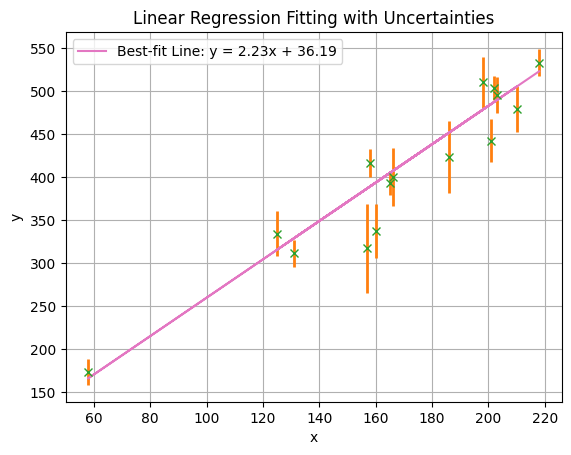



Standard uncertainty variance on the slope (σ_m^2): 0.016234642145436445


In [5]:
# Data Collection from Table 1 and then Converting it to Pandas DataFrame
x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533])
sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16])

# Calling the Plot Function
second_plot(x, y, sigma_y)

# 3. Calculate the p-value for the four chi-square values for the plot shown in class from astroMl book which can be found at https://www.astroml.org/book_figures_1ed/chapter4/fig_chi2_eval.html. (Hint : You can read off the χ2 values from the graph by multiplying by D.O.F.)

In [6]:
# Importing the Necessary Libraries
from scipy import stats

# Taken from the  as mentioned in the Question
c2_reduced = [0.96, 0.24,3.84,2.85]

N = 50  # Size of Data
Dof = N-1  # Degree of Freedom
typeOfErrors = ['correct errors','overestimated errors','underestimated errors','incorrect model']

for i in range(len(c2_reduced)):
    p = 1-stats.chi2(Dof).cdf(c2_reduced[i]*(N-1))
    print(f'P-Value for {typeOfErrors[i]} is : {p}')

P-Value for correct errors is : 0.5529264339960218
P-Value for overestimated errors is : 0.9999999917009567
P-Value for underestimated errors is : 0.0
P-Value for incorrect model is : 1.2107292945984227e-10
